In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### SOM

In [62]:
SOM_node_colors = ['#1619f0', '#ba27cd', '#a3201d', '#0df4f0', '#33a02c', '#ff7f00', '#f6f918', 'darkorange','olivedrab', 'blue','red', 'black']

# read the cluster numbers of SOM
WA_50_SOM_clusters_df = pd.read_csv(os.path.join(os.getcwd(),'Data','WA_with_som_cluster_384_50_7_finalized.csv'),
                                    index_col=0)[['StaID', 'som_cluster', 'Dam_Index']]

# read the error metrics for PUB model
WA_50_Geospatial_LSTM_Error_metrics_df = pd.read_csv(os.path.join(os.getcwd(),
                                                                  'Data',
                                                                  'WA_50_Geospatial_PUB_Variable_0d_LSTM_Error_metrics.csv'))[['StaID','KGE', 'kappa', 'kge_kappa_categories']]

som_error_df = pd.merge(WA_50_SOM_clusters_df, WA_50_Geospatial_LSTM_Error_metrics_df, on='StaID')
# plot box plots for kge and kappa

# above and below median plot as well

C:\Users\adadkhah\AppData\Local\Temp\ipykernel_1772\1178603126.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x='som_cluster', y='Value', width=0.55, notch=True,vert=True, palette=SOM_node_colors)
C:\Users\adadkhah\AppData\Local\Temp\ipykernel_1772\1178603126.py:8: UserWarning: The palette list has more values (12) than needed (7), which may not be intended.
  sns.boxplot(data=df_melted, x='som_cluster', y='Value', width=0.55, notch=True,vert=True, palette=SOM_node_colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


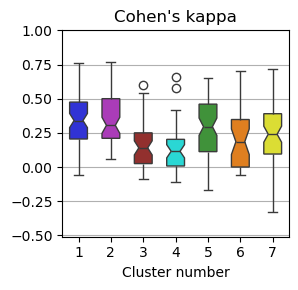

In [38]:
df_melted = som_error_df.melt(id_vars=['som_cluster'],
                                  value_vars=['kappa'],
                                  var_name='SOM cluster',
                                  value_name='Value')

# Create a box plot with multiple columns for each category
plt.figure(figsize=(3, 3))
sns.boxplot(data=df_melted, x='som_cluster', y='Value', width=0.55, notch=True,vert=True, palette=SOM_node_colors)
plt.legend().remove()
plt.title("Cohen's kappa")
plt.ylim((-0.51,1))
plt.xlabel('Cluster number')
plt.ylabel('')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('som_clusters_PUB_kappa_boxplots.png', dpi=300,transparent=True)

C:\Users\adadkhah\AppData\Local\Temp\ipykernel_1772\3368557098.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x='som_cluster', y='Value', width=0.55, notch=True,vert=True, palette=SOM_node_colors)
C:\Users\adadkhah\AppData\Local\Temp\ipykernel_1772\3368557098.py:8: UserWarning: The palette list has more values (12) than needed (7), which may not be intended.
  sns.boxplot(data=df_melted, x='som_cluster', y='Value', width=0.55, notch=True,vert=True, palette=SOM_node_colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


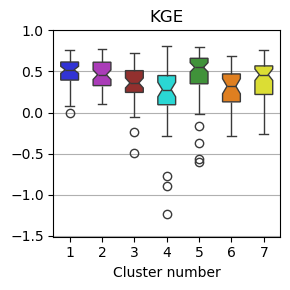

In [39]:
df_melted = som_error_df.melt(id_vars=['som_cluster'],
                                  value_vars=['KGE'],
                                  var_name='SOM cluster',
                                  value_name='Value')

# Create a box plot with multiple columns for each category
plt.figure(figsize=(3, 3))
sns.boxplot(data=df_melted, x='som_cluster', y='Value', width=0.55, notch=True,vert=True, palette=SOM_node_colors)
plt.legend().remove()
plt.title('KGE')
plt.ylim((-1.51,1))
plt.xlabel('Cluster number')
plt.ylabel('')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('som_clusters_PUB_KGE_boxplots.png', dpi=300,transparent=True)

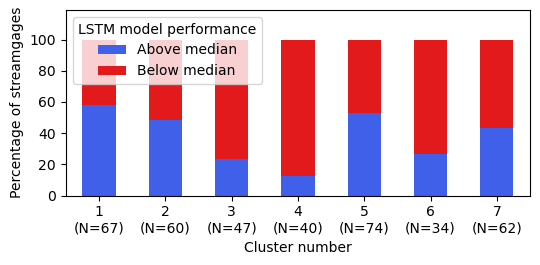

In [56]:
group_counts = som_error_df.groupby(['som_cluster', 'kge_kappa_categories']).size().unstack(fill_value=0)
group_perc = group_counts.div(group_counts.sum(axis=1), axis=0) * 100

# Plot the percentages
ax = group_perc.plot(figsize=(5.5,2.75), kind='bar', stacked=True,
                       color=['#4160ea', '#e31a1c'], rot=0)
# Plot the counts
#ax = group_counts.plot(figsize=(5.5,2.75),kind='bar', stacked=False, color=['#3954e8','#d16a21'], rot=0)
#for i in ax.patches:
#    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 4.5, str(int(i.get_height())), ha='center', va='top')

#for i, patch in enumerate(ax.patches):
    #ax.text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 8.5, str(int(group_counts.T.values.flatten()[i])),
            #ha='center', va='top',fontsize=11)

ax.legend(title='LSTM model performance', loc='upper left')
ax.set_xlabel('Cluster number')
ax.set_ylabel('Percentage of streamgages')
ax.set_ylim((0,119))
plt.xticks(ticks=plt.xticks()[0],labels=['1\n(N=67)', '2\n(N=60)', '3\n(N=47)', '4\n(N=40)', '5\n(N=74)', '6\n(N=34)', '7\n(N=62)'])
plt.tight_layout()
plt.savefig('PUB_som_clusters_2cat_barplot_stacked.png', dpi=300,transparent=True)

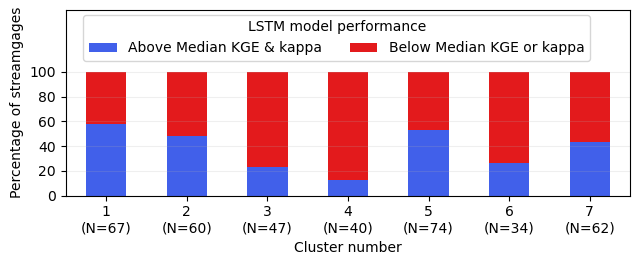

In [198]:
# replace above and below median with
som_error_df['kge_kappa_categories'] = som_error_df['kge_kappa_categories'].replace('Above median', 'Above Median KGE & kappa')
som_error_df['kge_kappa_categories'] = som_error_df['kge_kappa_categories'].replace('Below median', 'Below Median KGE or kappa')

group_counts = som_error_df.groupby(['som_cluster', 'kge_kappa_categories']).size().unstack(fill_value=0)
group_perc = group_counts.div(group_counts.sum(axis=1), axis=0) * 100

# Plot the percentages
ax = group_perc.plot(figsize=(6.5,2.75), kind='bar', stacked=True,
                       color=['#4160ea', '#e31a1c'], rot=0)
# Plot the counts
#ax = group_counts.plot(figsize=(5.5,2.75),kind='bar', stacked=False, color=['#3954e8','#d16a21'], rot=0)
#for i in ax.patches:
#    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 4.5, str(int(i.get_height())), ha='center', va='top')

#for i, patch in enumerate(ax.patches):
    #ax.text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 8.5, str(int(group_counts.T.values.flatten()[i])),
            #ha='center', va='top',fontsize=11)

ax.legend(title='LSTM model performance', loc='center',bbox_to_anchor=(0.48, 0.85), ncols=2,fontsize=10)
#legend = ax.legend()
#legend.set_visible(False)
ax.set_xlabel('Cluster number')
ax.set_ylabel('Percentage of streamgages')
ax.set_ylim((0,150))
ax.grid(axis='y', alpha=0.2)
plt.xticks(ticks=plt.xticks()[0],labels=['1\n(N=67)', '2\n(N=60)', '3\n(N=47)', '4\n(N=40)', '5\n(N=74)', '6\n(N=34)', '7\n(N=62)'])
plt.yticks([0, 20, 40, 60, 80, 100])
plt.tight_layout()
plt.savefig('PUB_som_clusters_2cat_barplot_stacked_04082025.png', dpi=300,transparent=True)

In [49]:
#som_error_df.groupby('som_cluster')['KGE'].describe().round(2).to_csv('PUB_SOM_KGE_summary_stats.csv')

In [50]:
#som_error_df.groupby('som_cluster')['kappa'].describe().round(2).to_csv('PUB_SOM_kappa_summary_stats.csv')

In [63]:
som_error_df['regulation_degree'] = som_error_df['Dam_Index'].apply(lambda x: 'Extreme regulation' if x>0.4
                                                                               else ('High regulation' if (x<=0.4)&(x>0.2)
                                                                                     else ('Moderate regulation' if (x<=0.2)&(x>0.1)
                                                                                           else ('Minor regulation' if (x<=0.1)&(x>0.05) 
                                                                                                 else ('No regulation' )))))

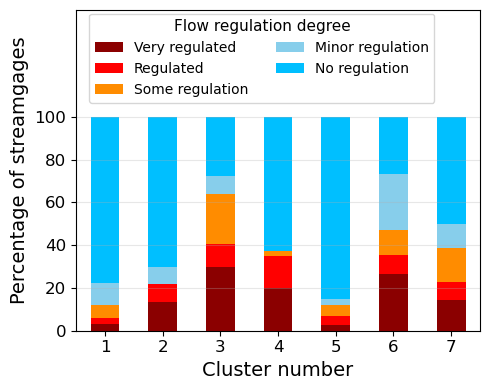

In [223]:
group_counts = som_error_df.groupby(['som_cluster', 'regulation_degree']).size().unstack(fill_value=0)
group_perc = group_counts.div(group_counts.sum(axis=1), axis=0) * 100
fig, ax = plt.subplots()

ax = group_perc.plot(figsize=(5,4),kind='bar', stacked=True, color=['darkred', 'red', 'darkorange','skyblue', 'deepskyblue'], rot=0,ax=ax)

ax.set_xlabel('Cluster number',fontsize=14)
ax.set_ylabel('Percentage of streamgages',fontsize=14)
ax.set_ylim((0,150))
ax.grid(axis='y', alpha=0.3)
legend = plt.legend(title='Flow regulation degree',
                    labels=['Very regulated','Regulated', 'Some regulation', 'Minor regulation', 'No regulation'],
                    fontsize=10, ncols=2, loc='center',
                    bbox_to_anchor=(0.46, 
                                    0.85))
legend.get_title().set_fontsize(11)
legend.get_title().set_ha('left')
legend.get_title().set_position((0, 0))
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks([0, 20, 40, 60, 80, 100])
plt.tight_layout()
plt.savefig('som_clusters_DoR_5cats_Mod_stacked_legend_04082025.png', dpi=300,transparent=True)

### SOMTimeS

In [74]:
somtimes_colors = ['#0cf4f4', '#930d0f', '#f6f918', '#1630ee', '#e259d0', '#139913', '#ff7f00', '#8db0c2', 'olivedrab', 
          'darkorange', 'cadetblue', 'turquoise', 'palegreen', 'goldenrod','darkred', 'coral', 'purple', 'navy']

# read the cluster numbers of SOM
WA_50_SOMTimeS_clusters_df = pd.read_csv(os.path.join(os.getcwd(),'Data','somtimes_clusters_376_8_finalized.csv'),
                                    index_col=0)[['StaID', 'somtimes_cluster','Dam_Index']]
# read the error metrics for PUB model
WA_50_Geospatial_LSTM_Error_metrics_df = pd.read_csv(os.path.join(os.getcwd(),
                                                                  'Data',
                                                                  'WA_50_Geospatial_PUB_Variable_0d_LSTM_Error_metrics.csv'))[['StaID','KGE', 'kappa', 'kge_kappa_categories']]

somtimes_error_df = pd.merge(WA_50_SOMTimeS_clusters_df, WA_50_Geospatial_LSTM_Error_metrics_df, on='StaID')
# plot box plots for kge and kappa

# above and below median plot as well

C:\Users\adadkhah\AppData\Local\Temp\ipykernel_1772\1824955481.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x='somtimes_cluster', y='Value', width=0.55, notch=True,vert=True, palette=somtimes_colors)
C:\Users\adadkhah\AppData\Local\Temp\ipykernel_1772\1824955481.py:9: UserWarning: The palette list has more values (18) than needed (8), which may not be intended.
  sns.boxplot(data=df_melted, x='somtimes_cluster', y='Value', width=0.55, notch=True,vert=True, palette=somtimes_colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


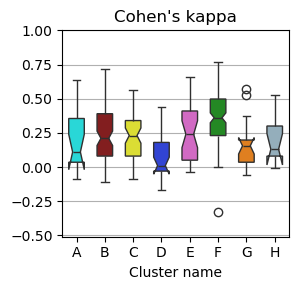

In [41]:
# adding error metrics to the somtimes df to plot errors
df_melted = somtimes_error_df.melt(id_vars=['somtimes_cluster'],
                                  value_vars=['kappa'],
                                  var_name='Erorr metric',
                                  value_name='Value')

# Create a box plot with multiple columns for each category
plt.figure(figsize=(3, 3))
sns.boxplot(data=df_melted, x='somtimes_cluster', y='Value', width=0.55, notch=True,vert=True, palette=somtimes_colors)
plt.legend().remove()
plt.title("Cohen's kappa")
plt.ylim((-0.51,1))
plt.xlabel('Cluster name')
plt.ylabel('')
plt.xticks(ticks=plt.xticks()[0],labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('somtimes_clusters_PUB_kappa_boxplots.png', dpi=300,transparent=True)

C:\Users\adadkhah\AppData\Local\Temp\ipykernel_1772\2532897455.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x='somtimes_cluster', y='Value', width=0.55, notch=True,vert=True, palette=somtimes_colors)
C:\Users\adadkhah\AppData\Local\Temp\ipykernel_1772\2532897455.py:8: UserWarning: The palette list has more values (18) than needed (8), which may not be intended.
  sns.boxplot(data=df_melted, x='somtimes_cluster', y='Value', width=0.55, notch=True,vert=True, palette=somtimes_colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


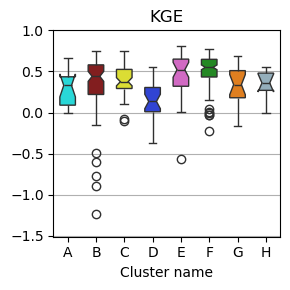

In [42]:
df_melted = somtimes_error_df.melt(id_vars=['somtimes_cluster'],
                                  value_vars=['KGE'],
                                  var_name='Erorr metric',
                                  value_name='Value')

# Create a box plot with multiple columns for each category
plt.figure(figsize=(3, 3))
sns.boxplot(data=df_melted, x='somtimes_cluster', y='Value', width=0.55, notch=True,vert=True, palette=somtimes_colors)
plt.legend().remove()
plt.title("KGE")
plt.ylim((-1.51,1))
plt.xlabel('Cluster name')
plt.ylabel('')
plt.xticks(ticks=plt.xticks()[0],labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('somtimes_clusters_PUB_KGE_boxplots.png', dpi=300,transparent=True)

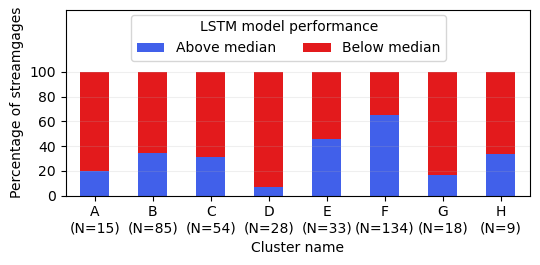

In [193]:
group_counts = somtimes_error_df.groupby(['somtimes_cluster', 'kge_kappa_categories']).size().unstack(fill_value=0)
group_perc = group_counts.div(group_counts.sum(axis=1), axis=0) * 100

# Plot the percentages
ax = group_perc.plot(figsize=(5.5,2.75), kind='bar', stacked=True,
                       color=['#4160ea', '#e31a1c'], rot=0)
# Plot the counts
#ax = group_counts.plot(figsize=(5.5,2.75),kind='bar', stacked=False, color=['#3954e8','#d16a21'], rot=0)
#for i in ax.patches:
#    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 4.5, str(int(i.get_height())), ha='center', va='top')

#for i, patch in enumerate(ax.patches):
    #ax.text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 8.5, str(int(group_counts.T.values.flatten()[i])),
            #ha='center', va='top',fontsize=11)
# Plot the counts
#ax = group_counts.plot(figsize=(5.5,2.75),kind='bar', stacked=False, color=['#3954e8','#d16a21'], rot=0)
#for i in ax.patches:
    #ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 6, str(int(i.get_height())), ha='center', va='top')

ax.legend(title='LSTM model performance', loc='center',bbox_to_anchor=(0.48, 0.85), ncols=2,fontsize=10 )
#legend = ax.legend()
#legend.set_visible(False)
ax.set_xlabel('Cluster name')
ax.set_ylabel('Percentage of streamgages')
plt.xticks(ticks=plt.xticks()[0],labels=['A\n(N=15)', 'B\n(N=85)', 'C\n(N=54)', 'D\n(N=28)', 'E\n(N=33)', 'F\n(N=134)', 'G\n(N=18)', 'H\n(N=9)'])
ax.set_ylim((0,150))
ax.grid(axis='y', alpha=0.2)
plt.yticks([0, 20, 40, 60, 80, 100])
plt.tight_layout()
#plt.savefig('PUB_somtimes_clusters_2cat_barplot_stacked_04082025.png', dpi=300,transparent=True)

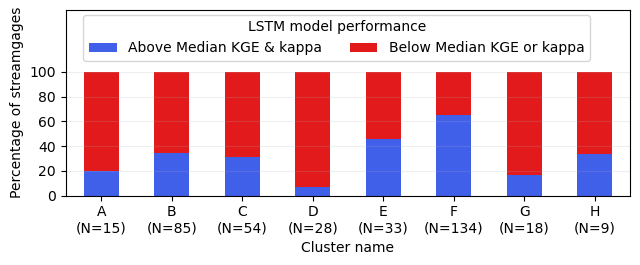

In [197]:
# replace above and below median with
somtimes_error_df['kge_kappa_categories'] = somtimes_error_df['kge_kappa_categories'].replace('Above median', 'Above Median KGE & kappa')
somtimes_error_df['kge_kappa_categories'] = somtimes_error_df['kge_kappa_categories'].replace('Below median', 'Below Median KGE or kappa')

group_counts = somtimes_error_df.groupby(['somtimes_cluster', 'kge_kappa_categories']).size().unstack(fill_value=0)
group_perc = group_counts.div(group_counts.sum(axis=1), axis=0) * 100

# Plot the percentages
ax = group_perc.plot(figsize=(6.5,2.75), kind='bar', stacked=True,
                       color=['#4160ea', '#e31a1c'], rot=0)
# Plot the counts
#ax = group_counts.plot(figsize=(5.5,2.75),kind='bar', stacked=False, color=['#3954e8','#d16a21'], rot=0)
#for i in ax.patches:
#    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 4.5, str(int(i.get_height())), ha='center', va='top')

#for i, patch in enumerate(ax.patches):
    #ax.text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 8.5, str(int(group_counts.T.values.flatten()[i])),
            #ha='center', va='top',fontsize=11)
# Plot the counts
#ax = group_counts.plot(figsize=(5.5,2.75),kind='bar', stacked=False, color=['#3954e8','#d16a21'], rot=0)
#for i in ax.patches:
    #ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 6, str(int(i.get_height())), ha='center', va='top')

ax.legend(title='LSTM model performance', loc='center',bbox_to_anchor=(0.48, 0.85), ncols=2,fontsize=10)
ax.set_xlabel('Cluster name')
ax.set_ylabel('Percentage of streamgages')
plt.xticks(ticks=plt.xticks()[0],labels=['A\n(N=15)', 'B\n(N=85)', 'C\n(N=54)', 'D\n(N=28)', 'E\n(N=33)', 'F\n(N=134)', 'G\n(N=18)', 'H\n(N=9)'])
ax.set_ylim((0,150))
ax.grid(axis='y', alpha=0.2)
plt.yticks([0, 20, 40, 60, 80, 100])
plt.tight_layout()
plt.savefig('PUB_somtimes_clusters_2cat_barplot_stacked.png', dpi=300,transparent=True)

In [52]:
somtimes_error_df.groupby('somtimes_cluster')['KGE'].describe().round(2).to_csv('PUB_SOMTimeS_KGE_summary_stats.csv')

In [53]:
somtimes_error_df.groupby('somtimes_cluster')['kappa'].describe().round(2).to_csv('PUB_SOMTimeS_kappa_summary_stats.csv')

In [75]:
somtimes_error_df['regulation_degree'] = somtimes_error_df['Dam_Index'].apply(lambda x: 'Extreme regulation' if x>0.4
                                                                               else ('High regulation' if (x<=0.4)&(x>0.2)
                                                                                     else ('Moderate regulation' if (x<=0.2)&(x>0.1)
                                                                                           else ('Minor regulation' if (x<=0.1)&(x>0.05) 
                                                                                                 else ('No regulation' )))))

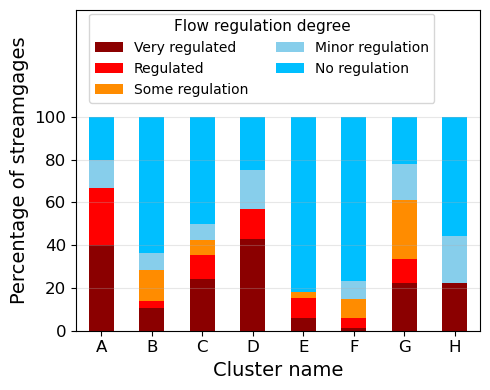

In [224]:
group_counts = somtimes_error_df.groupby(['somtimes_cluster', 'regulation_degree']).size().unstack(fill_value=0)
group_perc = group_counts.div(group_counts.sum(axis=1), axis=0) * 100
fig, ax = plt.subplots()

ax = group_perc.plot(figsize=(5,4),kind='bar', stacked=True, color=['darkred', 'red', 'darkorange','skyblue', 'deepskyblue'], rot=0,ax=ax)

ax.set_xlabel('Cluster name',fontsize=14)
ax.set_ylabel('Percentage of streamgages',fontsize=14)
ax.set_ylim((0,150))
ax.grid(axis='y', alpha=0.3)
legend = plt.legend(title='Flow regulation degree',
                    labels=['Very regulated', 'Regulated', 'Some regulation', 'Minor regulation', 'No regulation'],
                    ncols=2, loc='center',
                    fontsize=10,
                    bbox_to_anchor=(0.46, 0.85))
legend.get_title().set_fontsize(11)
plt.xticks(ticks=plt.xticks()[0],labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks([0, 20, 40, 60, 80, 100])
plt.tight_layout()
plt.savefig('somtimes_clusters_DoR_5cats_Mod_stacked_legend_04082025.png', dpi=300,transparent=True)